In [6]:
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import sys
import os
sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Proyecto7---Proyecto-Regresi-n-Lineal\\datos_2\\df_resultados_sin_out.csv', index_col=0)
df.head()

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3
0,750.0,60.0,705.594114,7037,695.243827,697.689843,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,750.0,70.0,701.418584,16145,695.243827,678.664014,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,590.0,70.0,679.539684,56596,695.243827,670.416613,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,684.0,45.0,705.594114,10656,682.123310,670.416613,673.705516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,600.0,73.0,680.840769,37062,695.243827,697.689843,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [8]:
df.describe()

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,697.383041,58.187135,699.222019,15923.950292,694.390111,691.470031,694.332330,0.002924,0.002924,0.040936,0.792398,0.023392,0.137427,0.184211,0.815789,0.140351,0.345029,0.368421,0.143275,0.002924,0.903509,0.093567,0.002924
std,53.758634,19.483412,8.242704,12812.121446,2.955258,13.139432,8.408550,0.054074,0.054074,0.198432,0.406185,0.151366,0.344802,0.388224,0.388224,0.347860,0.476074,0.483083,0.350866,0.054074,0.295696,0.291652,0.054074
min,500.000000,20.000000,665.564400,183.000000,682.123310,670.416613,673.705516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,670.000000,45.000000,695.904744,5591.750000,695.243827,678.664014,687.633544,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,710.000000,56.000000,701.418584,11697.000000,695.243827,696.092223,694.943208,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,748.500000,70.000000,705.594114,25012.250000,695.243827,701.698078,702.252872,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,750.000000,133.000000,705.594114,56596.000000,695.243827,710.750072,702.252872,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
lista_columnas = df.columns

In [21]:
lista_columnas.tolist
lista_columnas = lista_columnas[1:]

In [22]:
columnas_minmax = [col + "_minmax" for col in lista_columnas]

In [23]:
columnas_minmax

['size_minmax',
 'municipality_minmax',
 'distance_minmax',
 'status_minmax',
 'floor_minmax',
 'hasLift_minmax',
 'propertyType_chalet_minmax',
 'propertyType_countryHouse_minmax',
 'propertyType_duplex_minmax',
 'propertyType_flat_minmax',
 'propertyType_penthouse_minmax',
 'propertyType_studio_minmax',
 'exterior_False_minmax',
 'exterior_True_minmax',
 'rooms_0_minmax',
 'rooms_1_minmax',
 'rooms_2_minmax',
 'rooms_3_minmax',
 'rooms_4_minmax',
 'bathrooms_1_minmax',
 'bathrooms_2_minmax',
 'bathrooms_3_minmax']

In [24]:
columnas_robust = [col + "_robust" for col in lista_columnas]

In [25]:
columnas_robust

['size_robust',
 'municipality_robust',
 'distance_robust',
 'status_robust',
 'floor_robust',
 'hasLift_robust',
 'propertyType_chalet_robust',
 'propertyType_countryHouse_robust',
 'propertyType_duplex_robust',
 'propertyType_flat_robust',
 'propertyType_penthouse_robust',
 'propertyType_studio_robust',
 'exterior_False_robust',
 'exterior_True_robust',
 'rooms_0_robust',
 'rooms_1_robust',
 'rooms_2_robust',
 'rooms_3_robust',
 'rooms_4_robust',
 'bathrooms_1_robust',
 'bathrooms_2_robust',
 'bathrooms_3_robust']

In [26]:
columnas_norm = [col + "_norm" for col in lista_columnas]

In [27]:
columnas_norm

['size_norm',
 'municipality_norm',
 'distance_norm',
 'status_norm',
 'floor_norm',
 'hasLift_norm',
 'propertyType_chalet_norm',
 'propertyType_countryHouse_norm',
 'propertyType_duplex_norm',
 'propertyType_flat_norm',
 'propertyType_penthouse_norm',
 'propertyType_studio_norm',
 'exterior_False_norm',
 'exterior_True_norm',
 'rooms_0_norm',
 'rooms_1_norm',
 'rooms_2_norm',
 'rooms_3_norm',
 'rooms_4_norm',
 'bathrooms_1_norm',
 'bathrooms_2_norm',
 'bathrooms_3_norm']

In [28]:
columnas_stand = [col + "_stand" for col in lista_columnas]

In [29]:
columnas_stand

['size_stand',
 'municipality_stand',
 'distance_stand',
 'status_stand',
 'floor_stand',
 'hasLift_stand',
 'propertyType_chalet_stand',
 'propertyType_countryHouse_stand',
 'propertyType_duplex_stand',
 'propertyType_flat_stand',
 'propertyType_penthouse_stand',
 'propertyType_studio_stand',
 'exterior_False_stand',
 'exterior_True_stand',
 'rooms_0_stand',
 'rooms_1_stand',
 'rooms_2_stand',
 'rooms_3_stand',
 'rooms_4_stand',
 'bathrooms_1_stand',
 'bathrooms_2_stand',
 'bathrooms_3_stand']

In [30]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["size", 'municipality', 'distance', 'status', 'floor', 'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
                                                         'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse', 'propertyType_studio', 'exterior_False', 'exterior_True',
                                                         'rooms_0', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3']])
df[['size_robust',
 'municipality_robust',
 'distance_robust',
 'status_robust',
 'floor_robust',
 'hasLift_robust',
 'propertyType_chalet_robust',
 'propertyType_countryHouse_robust',
 'propertyType_duplex_robust',
 'propertyType_flat_robust',
 'propertyType_penthouse_robust',
 'propertyType_studio_robust',
 'exterior_False_robust',
 'exterior_True_robust',
 'rooms_0_robust',
 'rooms_1_robust',
 'rooms_2_robust',
 'rooms_3_robust',
 'rooms_4_robust',
 'bathrooms_1_robust',
 'bathrooms_2_robust',
 'bathrooms_3_robust']] = datos_transf_robust

escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df[["size", 'municipality', 'distance', 'status', 'floor', 'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
                                                         'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse', 'propertyType_studio', 'exterior_False', 'exterior_True',
                                                         'rooms_0', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3']])
df[['size_minmax',
 'municipality_minmax',
 'distance_minmax',
 'status_minmax',
 'floor_minmax',
 'hasLift_minmax',
 'propertyType_chalet_minmax',
 'propertyType_countryHouse_minmax',
 'propertyType_duplex_minmax',
 'propertyType_flat_minmax',
 'propertyType_penthouse_minmax',
 'propertyType_studio_minmax',
 'exterior_False_minmax',
 'exterior_True_minmax',
 'rooms_0_minmax',
 'rooms_1_minmax',
 'rooms_2_minmax',
 'rooms_3_minmax',
 'rooms_4_minmax',
 'bathrooms_1_minmax',
 'bathrooms_2_minmax',
 'bathrooms_3_minmax']] = datos_transf_min_max

escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df[["size",'municipality', 'distance', 'status', 'floor', 'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
                                                         'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse', 'propertyType_studio', 'exterior_False', 'exterior_True',
                                                         'rooms_0', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3']])
df[['size_norm',
 'municipality_norm',
 'distance_norm',
 'status_norm',
 'floor_norm',
 'hasLift_norm',
 'propertyType_chalet_norm',
 'propertyType_countryHouse_norm',
 'propertyType_duplex_norm',
 'propertyType_flat_norm',
 'propertyType_penthouse_norm',
 'propertyType_studio_norm',
 'exterior_False_norm',
 'exterior_True_norm',
 'rooms_0_norm',
 'rooms_1_norm',
 'rooms_2_norm',
 'rooms_3_norm',
 'rooms_4_norm',
 'bathrooms_1_norm',
 'bathrooms_2_norm',
 'bathrooms_3_norm']] = datos_transf_norm

escalador_stand = StandardScaler()
datos_transf_stand = escalador_stand.fit_transform(df[["size",'municipality', 'distance', 'status', 'floor', 'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
                                                         'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse', 'propertyType_studio', 'exterior_False', 'exterior_True',
                                                         'rooms_0', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3']])
df[['size_stand',
 'municipality_stand',
 'distance_stand',
 'status_stand',
 'floor_stand',
 'hasLift_stand',
 'propertyType_chalet_stand',
 'propertyType_countryHouse_stand',
 'propertyType_duplex_stand',
 'propertyType_flat_stand',
 'propertyType_penthouse_stand',
 'propertyType_studio_stand',
 'exterior_False_stand',
 'exterior_True_stand',
 'rooms_0_stand',
 'rooms_1_stand',
 'rooms_2_stand',
 'rooms_3_stand',
 'rooms_4_stand',
 'bathrooms_1_stand',
 'bathrooms_2_stand',
 'bathrooms_3_stand']] = datos_transf_stand

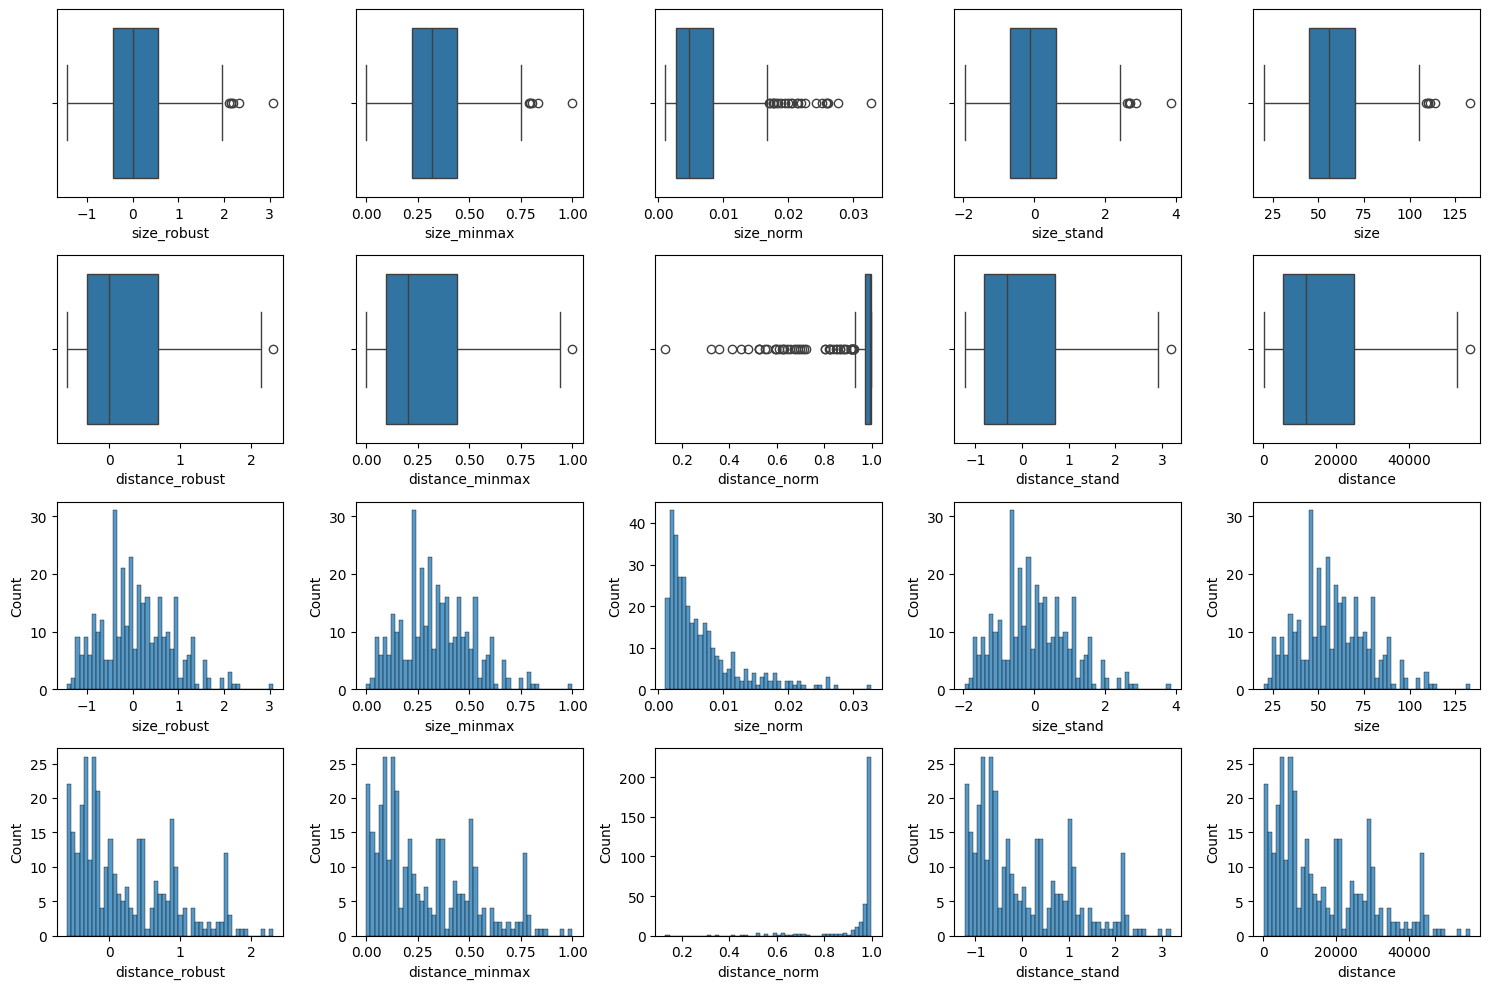

In [32]:
fig , axes = plt.subplots(nrows=4 , ncols=5, figsize = (15, 10))
sns.boxplot(x = "size_robust", data = df, ax = axes[0][0])
sns.boxplot(x = "size_minmax", data = df, ax = axes[0][1])
sns.boxplot(x = "size_norm", data = df, ax = axes[0][2])
sns.boxplot(x = "size_stand", data = df, ax = axes[0][3])
sns.boxplot(x = "size", data = df, ax = axes[0][4])

sns.boxplot(x = "distance_robust", data = df, ax = axes[1][0])
sns.boxplot(x = "distance_minmax", data = df, ax = axes[1][1])
sns.boxplot(x = "distance_norm", data = df, ax = axes[1][2])
sns.boxplot(x = "distance_stand", data = df, ax = axes[1][3])
sns.boxplot(x = "distance", data = df, ax = axes[1][4])

sns.histplot(x = "size_robust", data = df, ax = axes[2][0], bins = 50)
sns.histplot(x = "size_minmax", data = df, ax = axes[2][1], bins = 50)
sns.histplot(x = "size_norm", data = df, ax = axes[2][2], bins = 50)
sns.histplot(x = "size_stand", data = df, ax = axes[2][3], bins = 50)
sns.histplot(x = "size", data = df, ax = axes[2][4], bins = 50)


sns.histplot(x = "distance_robust", data = df, ax = axes[3][0], bins = 50)
sns.histplot(x = "distance_minmax", data = df, ax = axes[3][1], bins = 50)
sns.histplot(x = "distance_norm", data = df, ax = axes[3][2], bins = 50)
sns.histplot(x = "distance_stand", data = df, ax = axes[3][3], bins = 50)
sns.histplot(x = "distance", data = df, ax = axes[3][4], bins = 50)

plt.tight_layout()

## Observaciones

- Existen outliers en mi variable size, estos aparecen por encima de los 100 m2. Estos son pocos, pero debemos considerar qué tipo de pisos son 

In [36]:
df.shape

(342, 111)

In [35]:
df.head()

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,size_robust,municipality_robust,distance_robust,status_robust,floor_robust,hasLift_robust,propertyType_chalet_robust,propertyType_countryHouse_robust,propertyType_duplex_robust,propertyType_flat_robust,propertyType_penthouse_robust,propertyType_studio_robust,exterior_False_robust,exterior_True_robust,rooms_0_robust,rooms_1_robust,rooms_2_robust,rooms_3_robust,rooms_4_robust,bathrooms_1_robust,bathrooms_2_robust,bathrooms_3_robust,size_minmax,municipality_minmax,distance_minmax,status_minmax,floor_minmax,hasLift_minmax,propertyType_chalet_minmax,propertyType_countryHouse_minmax,propertyType_duplex_minmax,propertyType_flat_minmax,propertyType_penthouse_minmax,propertyType_studio_minmax,exterior_False_minmax,exterior_True_minmax,rooms_0_minmax,rooms_1_minmax,rooms_2_minmax,rooms_3_minmax,rooms_4_minmax,bathrooms_1_minmax,bathrooms_2_minmax,bathrooms_3_minmax,size_norm,municipality_norm,distance_norm,status_norm,floor_norm,hasLift_norm,propertyType_chalet_norm,propertyType_countryHouse_norm,propertyType_duplex_norm,propertyType_flat_norm,propertyType_penthouse_norm,propertyType_studio_norm,exterior_False_norm,exterior_True_norm,rooms_0_norm,rooms_1_norm,rooms_2_norm,rooms_3_norm,rooms_4_norm,bathrooms_1_norm,bathrooms_2_norm,bathrooms_3_norm,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,750.0,60.0,705.594114,7037,695.243827,697.689843,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.16,0.430939,-0.239953,0.000000,0.069359,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353982,1.000000,0.121497,1.0,0.676194,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.008362,0.098337,0.980733,0.096895,0.097236,0.097872,0.0,0.0,0.0,0.000139,0.0,0.000000,0.0,0.000139,0.000000,0.000139,0.000000,0.000000,0.0,0.000139,0.000000,0.0,0.093183,0.774192,-0.694652,0.289304,0.474063,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,1.37779,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
1,750.0,70.0,701.418584,16145,695.243827,678.664014,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.56,0.000000,0.229036,0.000000,-0.756628,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.442478,0.895689,0.282949,1.0,0.204480,0.487892,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.004320,0.043286,0.996349,0.042905,0.041882,0.042436,0.0,0.0,0.0,0.000062,0.0,0.000000,0.0,0.000062,0.000000,0.000000,0.000062,0.000000,0.0,0.000062,0.000000,0.0,0.607192,0.266876,0.017278,0.289304,-0.976053,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
2,590.0,70.0,679.539684,56596,695.243827,670.416613,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.56,-2.258031,2.311938,0.000000,-1.114680,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.442478,0.349123,1.000000,1.0,0.000000,0.487892,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.001236,0.012003,0.999708,0.012281,0.011842,0.012146,0.0,0.0,0.0,0.000018,0.0,0.000000,0.0,0.000018,0.000000,0.000000,0.000000,0.000018,0.0,0.000000,0.000018,0.0,0.607192,-2.391348,3.179149,0.289304,-1.604656,-0.797831,-0.05415

In [51]:
df_price = df[['price']]

In [52]:
df_price

,price
0,750.0
1,750.0
2,590.0
3,684.0
4,600.0
...,...
337,640.0
338,700.0
339,700.0
340,700.0


In [49]:
df_reverso = df.iloc[:, -22:]

In [50]:
df_reverso

,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,0.093183,0.774192,-0.694652,0.289304,0.474063,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,1.37779,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
1,0.607192,0.266876,0.017278,0.289304,-0.976053,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
2,0.607192,-2.391348,3.179149,0.289304,-1.604656,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,-0.763763,2.445320,-0.054153,-3.060006,3.112475,-0.054153
3,-0.677831,0.774192,-0.411772,-4.156921,-1.604656,-2.456670,-0.054153,-0.054153,-0.206598,-1.953689,-0.154765,2.505314,-0.475191,0.475191,2.474874,-0.72580,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
4,0.761395,-2.233270,1.652265,0.289304,0.474063,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,0.555791,-1.600957,1.046405,0.289304,0.352296,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
338,-0.215223,-0.369889,-0.333606,0.289304,0.779564,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,1.37779,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
339,0.041782,0.774192,-0.656195,0.289304,0.458137,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,1.37779,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
340,0.864197,0.048036,1.128322,0.289304,0.779564,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153


In [53]:
df_combinado = pd.concat([df_price, df_reverso], axis=1)

In [54]:
df_combinado

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,750.0,0.093183,0.774192,-0.694652,0.289304,0.474063,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,1.37779,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
1,750.0,0.607192,0.266876,0.017278,0.289304,-0.976053,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
2,590.0,0.607192,-2.391348,3.179149,0.289304,-1.604656,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,-0.763763,2.445320,-0.054153,-3.060006,3.112475,-0.054153
3,684.0,-0.677831,0.774192,-0.411772,-4.156921,-1.604656,-2.456670,-0.054153,-0.054153,-0.206598,-1.953689,-0.154765,2.505314,-0.475191,0.475191,2.474874,-0.72580,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
4,600.0,0.761395,-2.233270,1.652265,0.289304,0.474063,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,640.0,0.555791,-1.600957,1.046405,0.289304,0.352296,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
338,700.0,-0.215223,-0.369889,-0.333606,0.289304,0.779564,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,1.37779,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
339,700.0,0.041782,0.774192,-0.656195,0.289304,0.458137,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,1.37779,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
340,700.0,0.864197,0.048036,1.128322,0.289304,0.779564,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153


In [55]:
df_combinado.columns

Index(['price', 'size_stand', 'municipality_stand', 'distance_stand',
       'status_stand', 'floor_stand', 'hasLift_stand',
       'propertyType_chalet_stand', 'propertyType_countryHouse_stand',
       'propertyType_duplex_stand', 'propertyType_flat_stand',
       'propertyType_penthouse_stand', 'propertyType_studio_stand',
       'exterior_False_stand', 'exterior_True_stand', 'rooms_0_stand',
       'rooms_1_stand', 'rooms_2_stand', 'rooms_3_stand', 'rooms_4_stand',
       'bathrooms_1_stand', 'bathrooms_2_stand', 'bathrooms_3_stand'],
      dtype='object')

In [56]:
df_combinado.head()

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,750.0,0.093183,0.774192,-0.694652,0.289304,0.474063,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,1.37779,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
1,750.0,0.607192,0.266876,0.017278,0.289304,-0.976053,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
2,590.0,0.607192,-2.391348,3.179149,0.289304,-1.604656,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,-0.763763,2.445320,-0.054153,-3.060006,3.112475,-0.054153
3,684.0,-0.677831,0.774192,-0.411772,-4.156921,-1.604656,-2.456670,-0.054153,-0.054153,-0.206598,-1.953689,-0.154765,2.505314,-0.475191,0.475191,2.474874,-0.72580,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
4,600.0,0.761395,-2.233270,1.652265,0.289304,0.474063,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153


In [57]:
df_combinado.shape

(342, 23)

In [58]:
df_combinado.to_csv('../datos_2/df_combinado.csv')